In [2]:
##Import Libarires
import numpy as np #for numerical purposes
import pandas as pd #for handling dataset

import seaborn as sns  #for making charts and plots
import matplotlib.pyplot as plt #basic plotting library

from sklearn.model_selection import train_test_split # split data in to training and testng sets

from sklearn.pipeline import Pipeline,make_pipeline #pipeline: rin preprocessing and model in one step

##Model Selection / Hyperparameter tuning
from sklearn.model_selection import cross_val_score 

from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score , classification_report


import joblib # save trained model to a file an dload it later 


In [3]:
df = pd.read_csv('emails.csv')
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [4]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
df.iloc[0, :]['text']

"Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  ma

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [7]:
print(df.isna().sum()) #count of missing value
dp = df.dropna() # delete the row with na value

text    0
spam    0
dtype: int64


In [8]:
print(df.duplicated().sum())# count of the duplicate value
df.drop_duplicates(inplace = True) # remove all the duplicate rows
df.reset_index(inplace=True , drop = True)# remove the un-needed indexes after deleting the duplicated rows

33


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
counts = df['spam'].value_counts() #count how many emails belong to each class : 0 = not spam , 1 = spam

percentage = df['spam'].value_counts(normalize=True) * 100 # calculate the percent of spam and not spam mails

print("counts: \n" , counts)
print("\npercentage:\n",percentage)

counts: 
 spam
0    4327
1    1368
Name: count, dtype: int64

percentage:
 spam
0    75.978929
1    24.021071
Name: proportion, dtype: float64


In [11]:
#create a new column 'length' with the character count of each email
df['length'] = df['text'].apply(len)

#statistics of email length by class
length_stats = df.groupby('spam')['length'].describe()
print('\nStatistics of Email length by Class: \n')
print(length_stats)


Statistics of Email length by Class: 

       count         mean          std   min    25%     50%      75%      max
spam                                                                         
0     4327.0  1634.200139  1965.016383  13.0  577.5  1122.0  2037.50  43952.0
1     1368.0  1317.257310  2271.372893  18.0  401.5   693.5  1250.25  28432.0


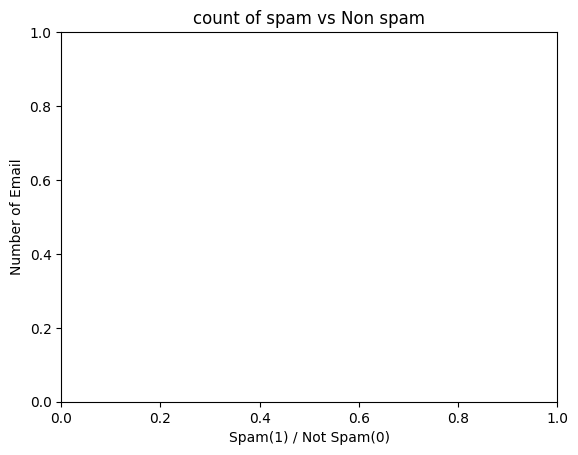

In [12]:
df['email_length'] = df['text'].str.len()

#1) Bar chart: Count of spam vs non- spam
plt.title("count of spam vs Non spam")
plt.xlabel("Spam(1) / Not Spam(0)")
plt.ylabel("Number of Email")
plt.show()